Importing Libraries

In [1]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from tqdm.notebook import tqdm 

# Configuration 



Dataset available on kaggle : https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [4]:
pip install kagglehub

   ---------------------------------------- 0.0/63.0 kB ? eta -:--:--
   ------ --------------------------------- 10.2/63.0 kB ? eta -:--:--
   ---------------------------------------- 63.0/63.0 kB 676.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\ahmed\python 3-11-4\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import kagglehub

custom_path = 'D:\learning-pytorch\projects'
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia",path=custom_path)
print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [18:48<00:00, 2.18MB/s] 

Extracting files...


Path to dataset files: C:\Users\ahmed\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2


In [39]:
class Configuration:
    
    epochs = 1
    lr = 0.001
    batch_size = 16
    
    model_name = 'tf_efficientnet_b4_ns'
    img_size = 224
     
    DATA_DIR = r"D:/learning-pytorch/projects/Pneumonia Classification/chest_xray/chest_xray"                        
    TEST = r"D:/learning-pytorch/projects/Pneumonia Classification/chest_xray/chest_xray/test"                                      
    TRAIN = r"D:/learning-pytorch/projects/Pneumonia Classification/chest_xray/chest_xray/train"                                    
    VAL = r"D:/learning-pytorch/projects/Pneumonia Classification/chest_xray/chest_xray/val"                                         

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("On which device we are on : {}".format(device))

On which device we are on : cpu


Accessing Intel GPU  
There is a option to acces Intel GPU, but only for following processors.  
Hardware Verified with Windows® 10 and 11
- Intel® Arc™ A-Series Graphics
- Intel® Core™ Ultra Processors with Intel Arc Graphics
- Intel Core Ultra Processors Series 2 with Intel Arc Graphics
- Intel Arc B-Series Graphics

# Image Transformation and Load Dataset 

In [42]:
from torchvision import transforms as T, datasets
from helper import show_image

Data Augmentation

In [37]:
train_transform = T.Compose([
    T.Resize(size = (Configuration.img_size,Configuration.img_size)),
    T.RandomRotation(degrees= (-20,+20)),
    T.ToTensor(), # (h,w,c) -> (c,h,w)
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

valid_transform = T.Compose([
    T.Resize(size = (Configuration.img_size,Configuration.img_size)),
    T.ToTensor(),
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

test_transform = T.Compose([
    T.Resize(size = (Configuration.img_size,Configuration.img_size)),
    T.ToTensor(),
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [40]:
trainset = datasets.ImageFolder(Configuration.TRAIN,transform=train_transform)
testset = datasets.ImageFolder(Configuration.TEST,transform=test_transform)
validset = datasets.ImageFolder(Configuration.VAL,transform=valid_transform)

In [41]:
print("Trainset Size : {}".format(len(trainset)))
print("Validset Size : {}".format(len(validset)))
print("Testset Size : {}".format(len(testset)))

Trainset Size : 5216
Validset Size : 16
Testset Size : 624


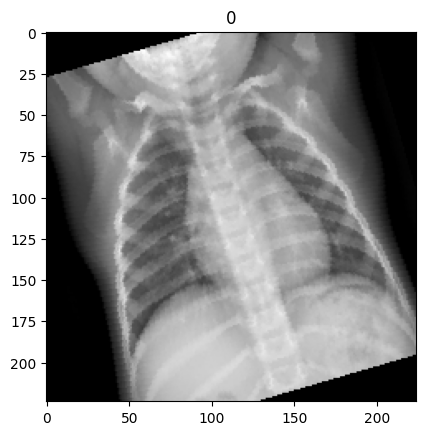

In [43]:
image,label = trainset[2]
show_image(image,label)